In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from ema_workbench.analysis import prim
from ema_workbench.util import ema_logging, utilities

ema_logging.log_to_stderr(ema_logging.INFO)

C:\Users\newbi\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
C:\Users\newbi\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


<Logger EMA (DEBUG)>

In [3]:
results = utilities.load_results('Outcomes/1000ScenariosBaseCase.csv')

experiments, outcomes = results
outcomes = pd.DataFrame(outcomes)
experiments = pd.DataFrame(experiments)
results = experiments.join(outcomes)
results = results.drop(columns="model")
# results = results.apply(pd.to_numeric)
results.head()

[MainProcess/INFO] results loaded succesfully from C:\Users\newbi\project-local\Model-based-decision-making\Outcomes\1000ScenariosBaseCase.csv


,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.3_Dike Investment Costs 2,A.3_Expected Number of Deaths 2,A.4_Expected Annual Damage 2,A.4_Dike Investment Costs 2,A.4_Expected Number of Deaths 2,A.5_Expected Annual Damage 2,A.5_Dike Investment Costs 2,A.5_Expected Number of Deaths 2,RfR Total Costs 2,Expected Evacuation Costs 2
0,64.0,341.707998,10.0,0.008967,329.059434,1.0,0.671443,46.836038,1.0,0.541864,...,0,0.000000,0.0,0,0.0,0.0,0,0.0,0.0,0.0
1,49.0,270.516534,1.0,0.389864,64.116779,1.0,0.458602,211.600292,1.5,0.030226,...,0,1.053592,0.0,0,0.0,0.0,0,0.0,0.0,0.0
2,109.0,217.092157,1.0,0.720433,119.844801,1.5,0.445405,332.843340,10.0,0.123183,...,0,1.091069,0.0,0,0.0,0.0,0,0.0,0.0,0.0
3,106.0,314.195207,1.0,0.000931,149.934556,10.0,0.203409,177.126583,1.5,0.900999,...,0,0.000000,0.0,0,0.0,0.0,0,0.0,0.0,0.0
4,123.0,331.097660,1.5,0.138750,275.055604,1.0,0.296295,172.209395,1.5,0.888339,...,0,0.000000,0.0,0,0.0,0.0,0,0.0,0.0,0.0


In [4]:
# Aggregate the outcomes (no location and no time step)

def aggregate_outcomes(results, outcome):
    list_outcomes_columns = []
    
    for i in results.columns:
        if outcome in i:
            list_outcomes_columns.append(i)
            
    results["Total " + str(outcome)] = results[list_outcomes_columns].sum(axis = 1)
            
#     print(list_outcomes_columns)

In [5]:
aggregate_outcomes(results, "Expected Number of Deaths")
aggregate_outcomes(results, "Expected Annual Damage")

In [6]:
#  results.columns

In [46]:
def boxplot_histogram_maker(results):
    fig, axes = plt.subplots(1, 2, figsize=(10, 3))
    outcomes_list = ["Total Expected Number of Deaths", "Total Expected Annual Damage"]
    
    for i, (ax, outcome) in enumerate(zip(axes.flatten(), outcomes_list)):
        ax.boxplot(results[outcome])
        print(str(outcome) + " First quantile: " + str(results[outcome].quantile(q = 0.25)))
        print(str(outcome) + " Mean: " + str(results[outcome].mean()))
        
    plt.show()
    
    fig, axes = plt.subplots(1, 2, figsize=(10, 3))
    
    for i, (ax, outcome) in enumerate(zip(axes.flatten(), outcomes_list)):
        ax.hist(results[outcome])
        ax.set_title(outcome)

Total Expected Number of Deaths First quantile: 0.614663518226044
Total Expected Number of Deaths Mean: 1.61575355331798
Total Expected Annual Damage First quantile: 583888960.7998052
Total Expected Annual Damage Mean: 1678899372.4850564


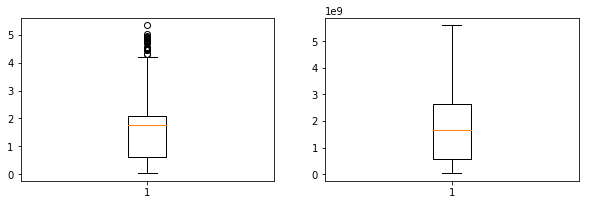

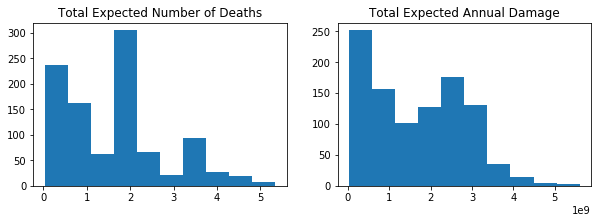

In [47]:
boxplot_histogram_maker(results)

In [ ]:
x = results.iloc[:, :19].drop("A.3_pfail")
y_deaths = results["Total Expected Number of Deaths"].values

In [ ]:
y_deaths = y_deaths < 1

In [ ]:
prim_alg = prim.Prim(x, y_deaths, threshold=0.65, peel_alpha=0.1)
box1 = prim_alg.find_box()

In [ ]:
# Coverage is the points of interests in the red box 
# Density is fraction of cases in the box
# 

box1.show_tradeoff()
plt.show()

In [ ]:
box1.inspect()
box1.inspect(style='graph')
plt.show()

In [ ]:
box1.select(19)
box1.show_pairs_scatter()
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.show()

In [ ]:
box2 = prim_alg.find_box()

In [ ]:
box2.select(-1)
box2.show_pairs_scatter()
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.show()

In [ ]:
print(prim_alg.stats_to_dataframe())
print(prim_alg.boxes_to_dataframe())

In [ ]:
from ema_workbench.analysis import dimensional_stacking

dimensional_stacking.create_pivot_plot(x, y_deaths, 3, nbins = 2)
plt.show()

In [ ]:
experiments.columns

In [ ]:
experiments, outcomes = utilities.load_results('Outcomes/400Scenarios75Policies.csv')
experiments = experiments.drop(columns = "model")
experiments = pd.DataFrame(experiments)
outcomes = pd.DataFrame(outcomes)


# from ema_workbench.analysis import feature_scoring
# scores = feature_scoring.get_feature_scores_all(experiments, outcomes)
# sns.heatmap(scores)
# plt.show()

In [ ]:
experiments.columns

In [ ]:
def column_finder(location):    
    list_loc = []

    for i in experiments.columns:
        if location in i:
            list_loc.append(i)
            
    a = "A.1"[-1]
    a = int(a) - 1
            
    for i in experiments.columns:
        if str(a) + "_RfR" in i:
            list_loc.append(i)
            
    list_loc.extend(["A.0_ID flood wave shape", "discount rate 0", "discount rate 1", "discount rate 2"])
            
    global x 
    x = experiments[list_loc]

    list_loc_2 = []
    
    for i in outcomes.columns:
        if location in i:
            list_loc_2.append(i)
            
    global y 
    y = outcomes[list_loc_2]

In [ ]:
column_finder("A.1")

In [ ]:
x.columns

In [ ]:
from ema_workbench.analysis import feature_scoring
fs = feature_scoring.get_feature_scores_all(x, y)
fig = plt.subplots(figsize=(10,10))
sns.heatmap(fs, cmap='viridis', annot=True)
plt.show()